In [77]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from random import sample
import pandas as pd
import random

In [2]:
def poisson(lbda,i,n):
    y = []
    for k in range(1,n):
        u1 = np.random.uniform(0,1)
        if i != 0:
            j = i+1 if u1 < 0.5 else i-1
        else:
            j = 0 if u1 < 0.5 else 1
        
        if i==0 and j == 0:
            r = 1
        elif j == i+1:
            r = lbda/j
        elif j == i-1:
            r = i/lbda
        
        u2 = np.random.uniform(0,1)
        new = j if r>=1 else (j if u2<r else i)
        i = new
        y.append(i)
        
    return y
                

c:\users\vinym\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


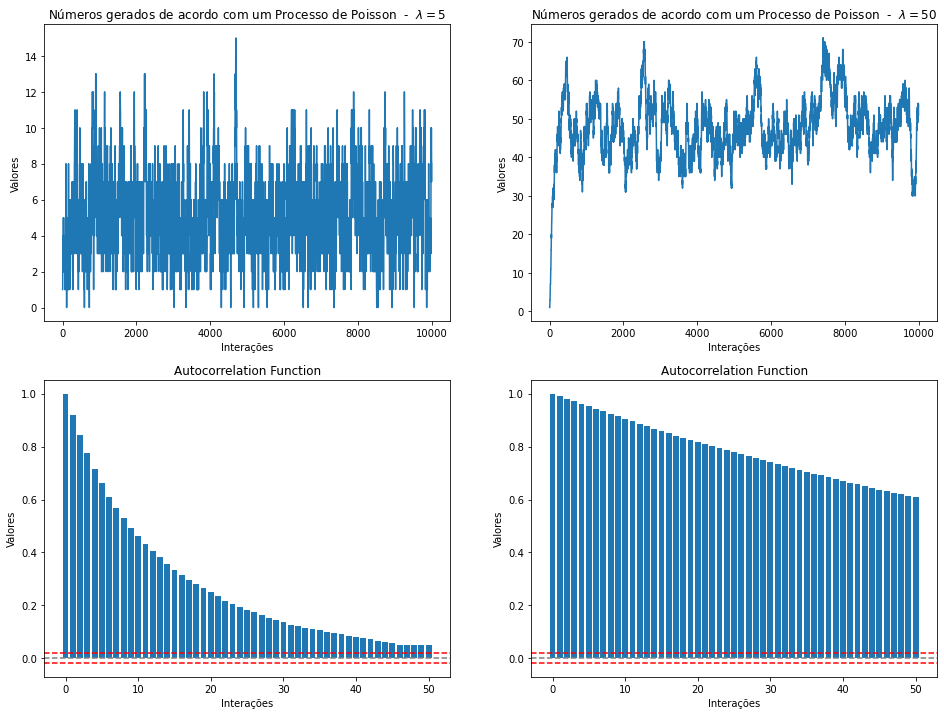

In [3]:
lbda = [5,50]
n = 10000

fig, axs = plt.subplots(2,2,figsize=(16,12))
st = [0,1]

for s in st:
    x = poisson(lbda[s],1,n)
    axs[0][s].plot(range(1,n), x)
    axs[0][s].set_title(f'Números gerados de acordo com um Processo de Poisson  -  $\lambda = {lbda[s]}$')
    axs[0][s].set_xlabel("Interações")
    axs[0][s].set_ylabel("Valores")
    
    lag_acf = acf(x, nlags = 50)
    #Plot ACF: 
    axs[1][s].bar(np.arange(51),lag_acf)
    axs[1][s].axhline(y=0,linestyle='--',color='gray')
    axs[1][s].axhline(y=-1.96/np.sqrt(len(x)),linestyle='--',color='r')
    axs[1][s].axhline(y=1.96/np.sqrt(len(x)),linestyle='--',color='r')
    axs[1][s].set_title('Autocorrelation Function')
    axs[1][s].set_xlabel("Interações")
    axs[1][s].set_ylabel("Valores")

plt.show(True)


In [4]:
def prob(x):
    return ((x-0.5)**4)*math.exp(-3*abs(x))*math.cos(x)**2

In [5]:
def metro(i,n):
    y = []
    for k in range(1,n):
        u = np.random.uniform(0,1)
        j = i + sample([-1,1],1)[0]
        r = prob(j)/prob(i)
        new = j if (r>=1) else (j if u<r else i)
        i = new
        y.append(i)
    return y

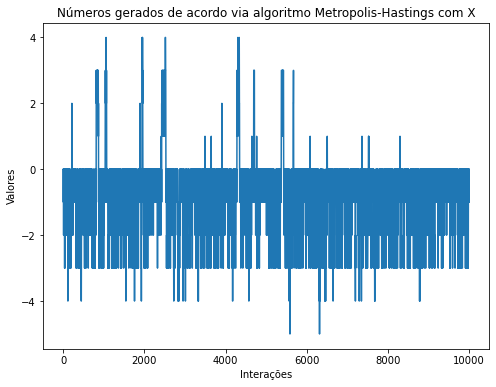

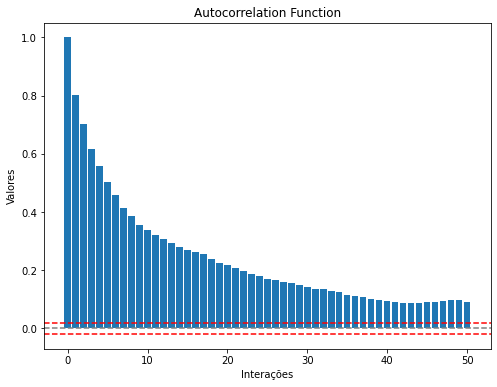

In [6]:
n = 10000


plt.figure(figsize = (8,6))
x = metro(1,n)

plt.plot(range(1,n), x)
plt.title(f'Números gerados de acordo via algoritmo Metropolis-Hastings com X')
plt.xlabel("Interações")
plt.ylabel("Valores")


plt.figure(figsize = (8,6))
lag_acf = acf(x, nlags = 50)
#Plot ACF: 
plt.bar(np.arange(51),lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x)),linestyle='--',color='r')
plt.axhline(y=1.96/np.sqrt(len(x)),linestyle='--',color='r')
plt.title('Autocorrelation Function')
plt.xlabel("Interações")
plt.ylabel("Valores")

plt.show(True)

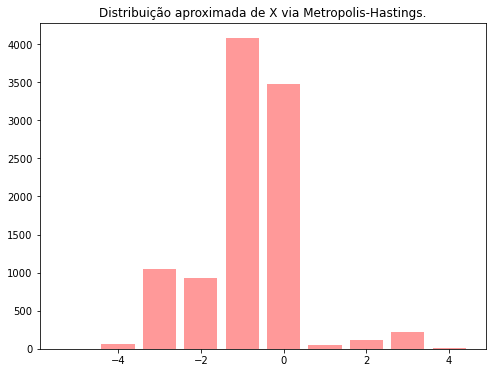

In [7]:
dic = dict()

for elem in x:
    if elem in dic:
        dic[elem] += 1
    else:
        dic[elem] = 1

plt.figure(figsize = (8,6))
plt.bar(dic.keys(), dic.values(),color="#FF9999")
plt.title("Distribuição aproximada de X via Metropolis-Hastings.")
plt.show(True)

c:\users\vinym\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


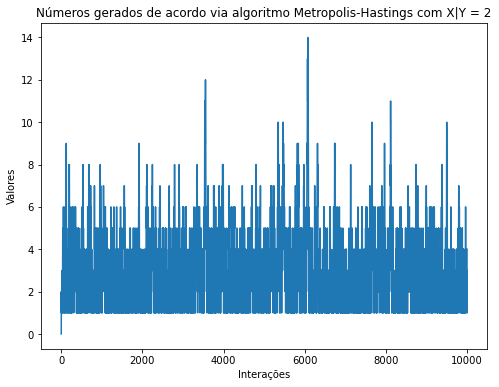

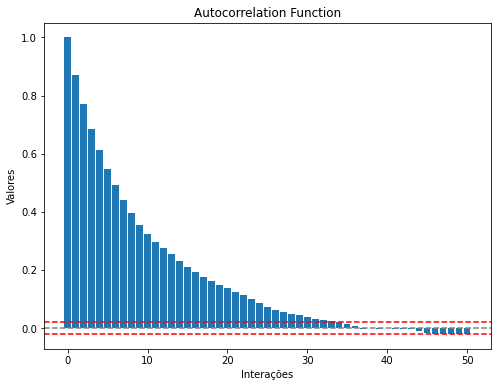

In [33]:
def prob(x,y):
    return math.exp(-x)*(x**y)

def metro1(y,i,n):
    x = np.zeros(n)
    
    for k in range(1,n):
        if i==1:
            j = i + sample([0,1],1)[0]
        if i ==20:
            j = i + sample([0,-1],1)[0]
        if (i>1 and i<20):
            j = i + sample([-1,1],1)[0]
            
        r = prob(j,y)/prob(i,y)
        u = np.random.uniform(0,1)

        new = j if (r>=1) else (j if u<r else i)
        i = new
        x[k] = i
    return x

n = 10000


plt.figure(figsize = (8,6))
x = metro1(2, 1,n)

plt.plot(range(n), x)
plt.title(f'Números gerados de acordo via algoritmo Metropolis-Hastings com X|Y = 2')
plt.xlabel("Interações")
plt.ylabel("Valores")


plt.figure(figsize = (8,6))
lag_acf = acf(x, nlags = 50)
#Plot ACF: 
plt.bar(np.arange(51),lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x)),linestyle='--',color='r')
plt.axhline(y=1.96/np.sqrt(len(x)),linestyle='--',color='r')
plt.title('Autocorrelation Function')
plt.xlabel("Interações")
plt.ylabel("Valores")

plt.show(True)

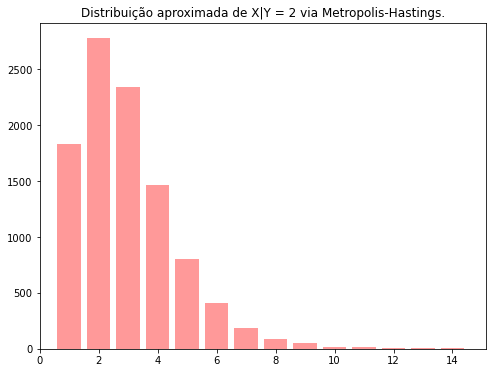

In [34]:
dic = dict()

for elem in x:
    if elem in dic:
        dic[elem] += 1
    else:
        dic[elem] = 1

plt.figure(figsize = (8,6))
plt.bar(dic.keys(), dic.values(),color="#FF9999")
plt.title("Distribuição aproximada de X|Y = 2 via Metropolis-Hastings.")
plt.xlim(0)
plt.show(True)

In [51]:
def prob(x,y,n):
    return math.exp(-n*x)*(x**np.sum(y))

def metro2(y,i,nmax):
    x = np.zeros(nmax)
    n = len(y)
    
    for k in range(1,nmax):
        if i==1:
            j = i + sample([0,1],1)[0]
        if i ==20:
            j = i + sample([0,-1],1)[0]
        if (i>1 and i<20):
            j = i + sample([-1,1],1)[0]
            
        r = prob(j,y,n)/prob(i,y,n)
        u = np.random.uniform(0,1)

        new = j if (r>=1) else (j if u<r else i)
        i = new
        x[k] = i
    return x


c:\users\vinym\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


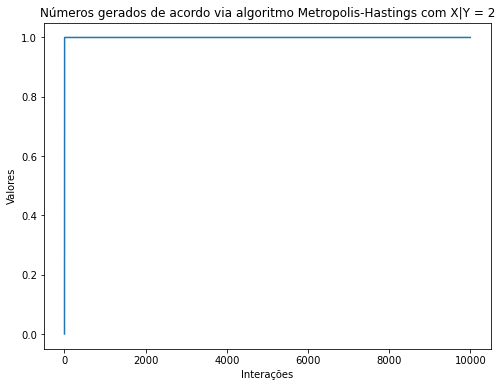

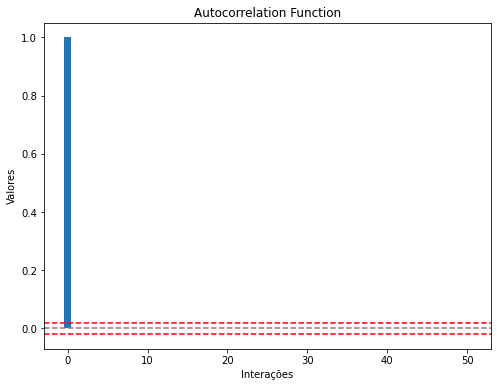

In [52]:
nmax = 10000
lbda = 15

y = np.random.poisson(lam = lbda, size = 10)

x = metro2(y, 1,nmax)

plt.figure(figsize = (8,6))
plt.plot(range(n), x)
plt.title(f'Números gerados de acordo via algoritmo Metropolis-Hastings com X|Y = 2')
plt.xlabel("Interações")
plt.ylabel("Valores")


plt.figure(figsize = (8,6))
lag_acf = acf(x, nlags = 50)
#Plot ACF: 
plt.bar(np.arange(51),lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x)),linestyle='--',color='r')
plt.axhline(y=1.96/np.sqrt(len(x)),linestyle='--',color='r')
plt.title('Autocorrelation Function')
plt.xlabel("Interações")
plt.ylabel("Valores")

plt.show(True)

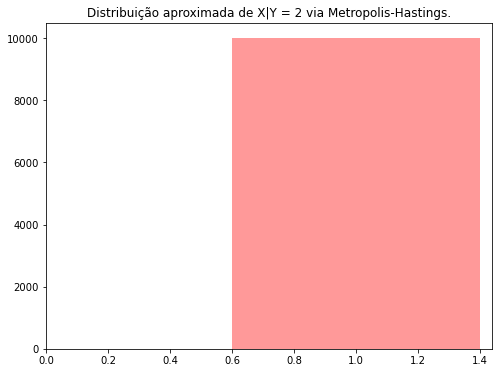

In [50]:
dic = dict()

for elem in x:
    if elem in dic:
        dic[elem] += 1
    else:
        dic[elem] = 1

plt.figure(figsize = (8,6))
plt.bar(dic.keys(), dic.values(),color="#FF9999")
plt.title("Distribuição aproximada de X|Y = 2 via Metropolis-Hastings.")
plt.xlim(0)
plt.show(True)

[     0      0     27    102    306   1222   2848  10131  45095 251373]
[     0      0     13     24    170    385    851   5692  16603 168156]
[     0      0     14     78    136    837   1997   4439  28492  83217
      0      0     13     24    170    385    851   5692  16603 168156]


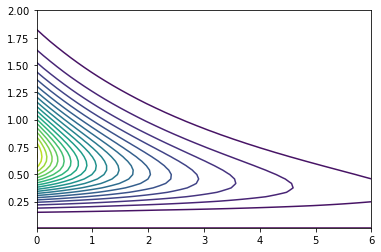

In [112]:
def gibbs(x0, y0,nmax):
    x = np.zeros(nmax,dtype=int)
    y = np.zeros(nmax,dtype=int)
    x[0] = x0
    y[0] = y0
    
    for i in range(2,nmax):
        x[i] = np.random.gamma(2+y[i-1],5)
        y[i] = np.random.exponential(x[i])
    print(x+y)
    print(y)
    return np.concatenate((x,y))

def contorno(M):
    x = np.linspace(0,6,M)
    y = np.linspace(0.01,2,M)
    f = np.zeros((M,M), dtype=np.float64)

    for i in range(0,M):
        for j in range(0,M):
            f[i][j] = (x[i]**4)*(math.exp(-x[i]*(2+y[j])))
            
    plt.contour(x,y,f,levels = 20)

plt.figure()
contorno(50)
random.seed(134)
m = gibbs(x0=0,y0=0,nmax = 10)

    
print(m)


In [96]:
np.random.gamma(5, 2+y[2-1])

84.8855187067454